# SOBM Simulation
- Juan Sebastián Cárdenas Rodríguez  
  201710008101  
  jscardenar@eafit.edu.co
## Parameters

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

N = 200 # Number of SOBM's
delta_t = 0.01 # Time skips
np.random.seed(103948440) # Seed to assure same result

## Simulation

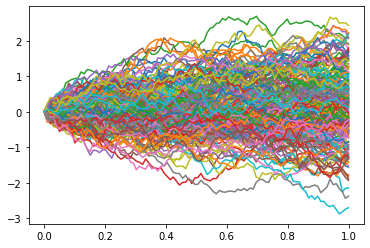

In [8]:
mb = np.zeros((N, int(1 / delta_t)))
for i in range(N):
    for j in range(1, int(1 / delta_t)):
        mb[i, j] = mb[i , j - 1] + np.sqrt(delta_t) * np.random.normal(0, 1)
        
t = np.linspace(0, 1, int(1 / delta_t))
        
for i in range(N):
    plt.plot(t, mb[i, :])
plt.show()

$\forall t \ge 0, \quad B_t \sim N(0, t)$

mu = 0.08869514297341699
sigma^2 = 0.51346009949449


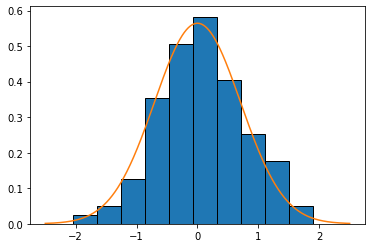

In [33]:
t = 0.5 # Test in random time
b_t = mb[:, int(t / delta_t)] # B_t

mu = np.mean(b_t) # Mean
sigma = np.var(b_t, ddof=1) # Standard deviation


print("mu =", mu)
print("sigma^2 =", sigma)
plt.hist(b_t, density=True, edgecolor='k') # Histogram normalized

x_norm = np.linspace(-2.5, 2.5, 1000)
plt.plot(x_norm, st.norm.pdf(x_norm, 0, np.sqrt(t)))
plt.show()

$\forall t \ge s, \quad B_t - B_s \sim N(0, t-s)$

mu = 0.04547921064849511
sigma^2 = 0.1053761077962531


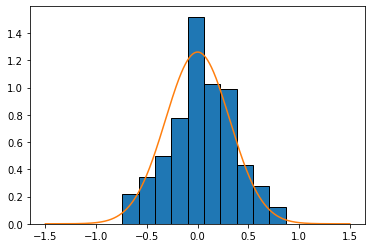

In [36]:
t = 0.5 # Test in random time
s = 0.4 # Test in random time

b_t = mb[:, int(t / delta_t)] # B_t
b_s = mb[:, int(s / delta_t)] # B_s

b_ts = b_t - b_s # Subtraction
mu = np.mean(b_ts) # Mean
sigma = np.var(b_ts, ddof=1) # Standard deviation


print("mu =", mu)
print("sigma^2 =", sigma)
plt.hist(b_ts, density=True, edgecolor='k') # Histogram normalized

x_norm = np.linspace(-1.5, 1.5, 1000)
plt.plot(x_norm, st.norm.pdf(x_norm, 0, np.sqrt(t - s)))
plt.show()

## Properties
$\forall t \ge s,  \quad B_t - B_s \stackrel{d}{=} B_{t + h} - B_{s + h}$ 

B_t - B_s
mu = 0.04547921064849511
sigma^2 = 0.1053761077962531

B_{t + h} - B_{s + h}
mu = 0.04547921064849511
sigma^2 = 0.1053761077962531


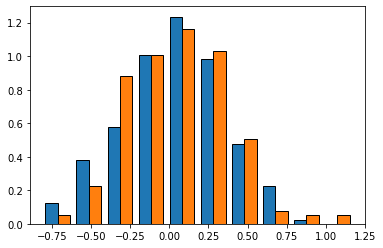

In [41]:
t = 0.5 # Test in random time
s = 0.4 # Test in random time
h = 0.15 # Displacement

b_t = mb[:, int(t / delta_t)] # B_t
b_s = mb[:, int(s / delta_t)] # B_s

b_th = mb[:, int((t + h) / delta_t)]
b_sh = mb[:, int((s + h) / delta_t)]

b_ts = b_t - b_s # Subtraction
mu1 = np.mean(b_ts) # Mean
sigma1 = np.var(b_ts, ddof=1) # Standard deviation

b_tsh = b_th - b_sh # Subtraction
mu2 = np.mean(b_tsh) # Mean
sigma2 = np.var(b_tsh, ddof=1) # Standard deviation

print("B_t - B_s")
print("mu =", mu)
print("sigma^2 =", sigma)

print("\nB_{t + h} - B_{s + h}")
print("mu =", mu)
print("sigma^2 =", sigma)

plt.hist([b_ts, b_tsh], density=True, edgecolor='k',
         label=["Original", "With displacement."]) # Histogram normalized
plt.show()